### Introduction

For our project, we have chosen ResNet50 for Transfer Learning. ResNet50 is a pre-trained CNN model that was trained on the ImageNet dataset.

> **Our objective is to implement transfer learning and build a robust model that can achieve high accuracy in classifying 500 species of birds.**

### 1. Data Preparation

In [1]:
#import necessary packages

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Define the parameters

input_shape = (224,224,3)
resnet_weights_path = 'imagenet'
num_classes = 525
image_size = 224
batch_size = 64

In [3]:
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = data_generator.flow_from_directory('/kaggle/input/100-bird-species/train',
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = True, 
                                                    class_mode = 'categorical')


val_generator = data_generator.flow_from_directory('/kaggle/input/100-bird-species/valid',
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = False,
                                                    class_mode = 'categorical')

test_generator = data_generator.flow_from_directory('/kaggle/input/100-bird-species/test',
                                                    target_size = (image_size,image_size),
                                                    batch_size = batch_size, 
                                                    shuffle = False,
                                                    class_mode = 'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


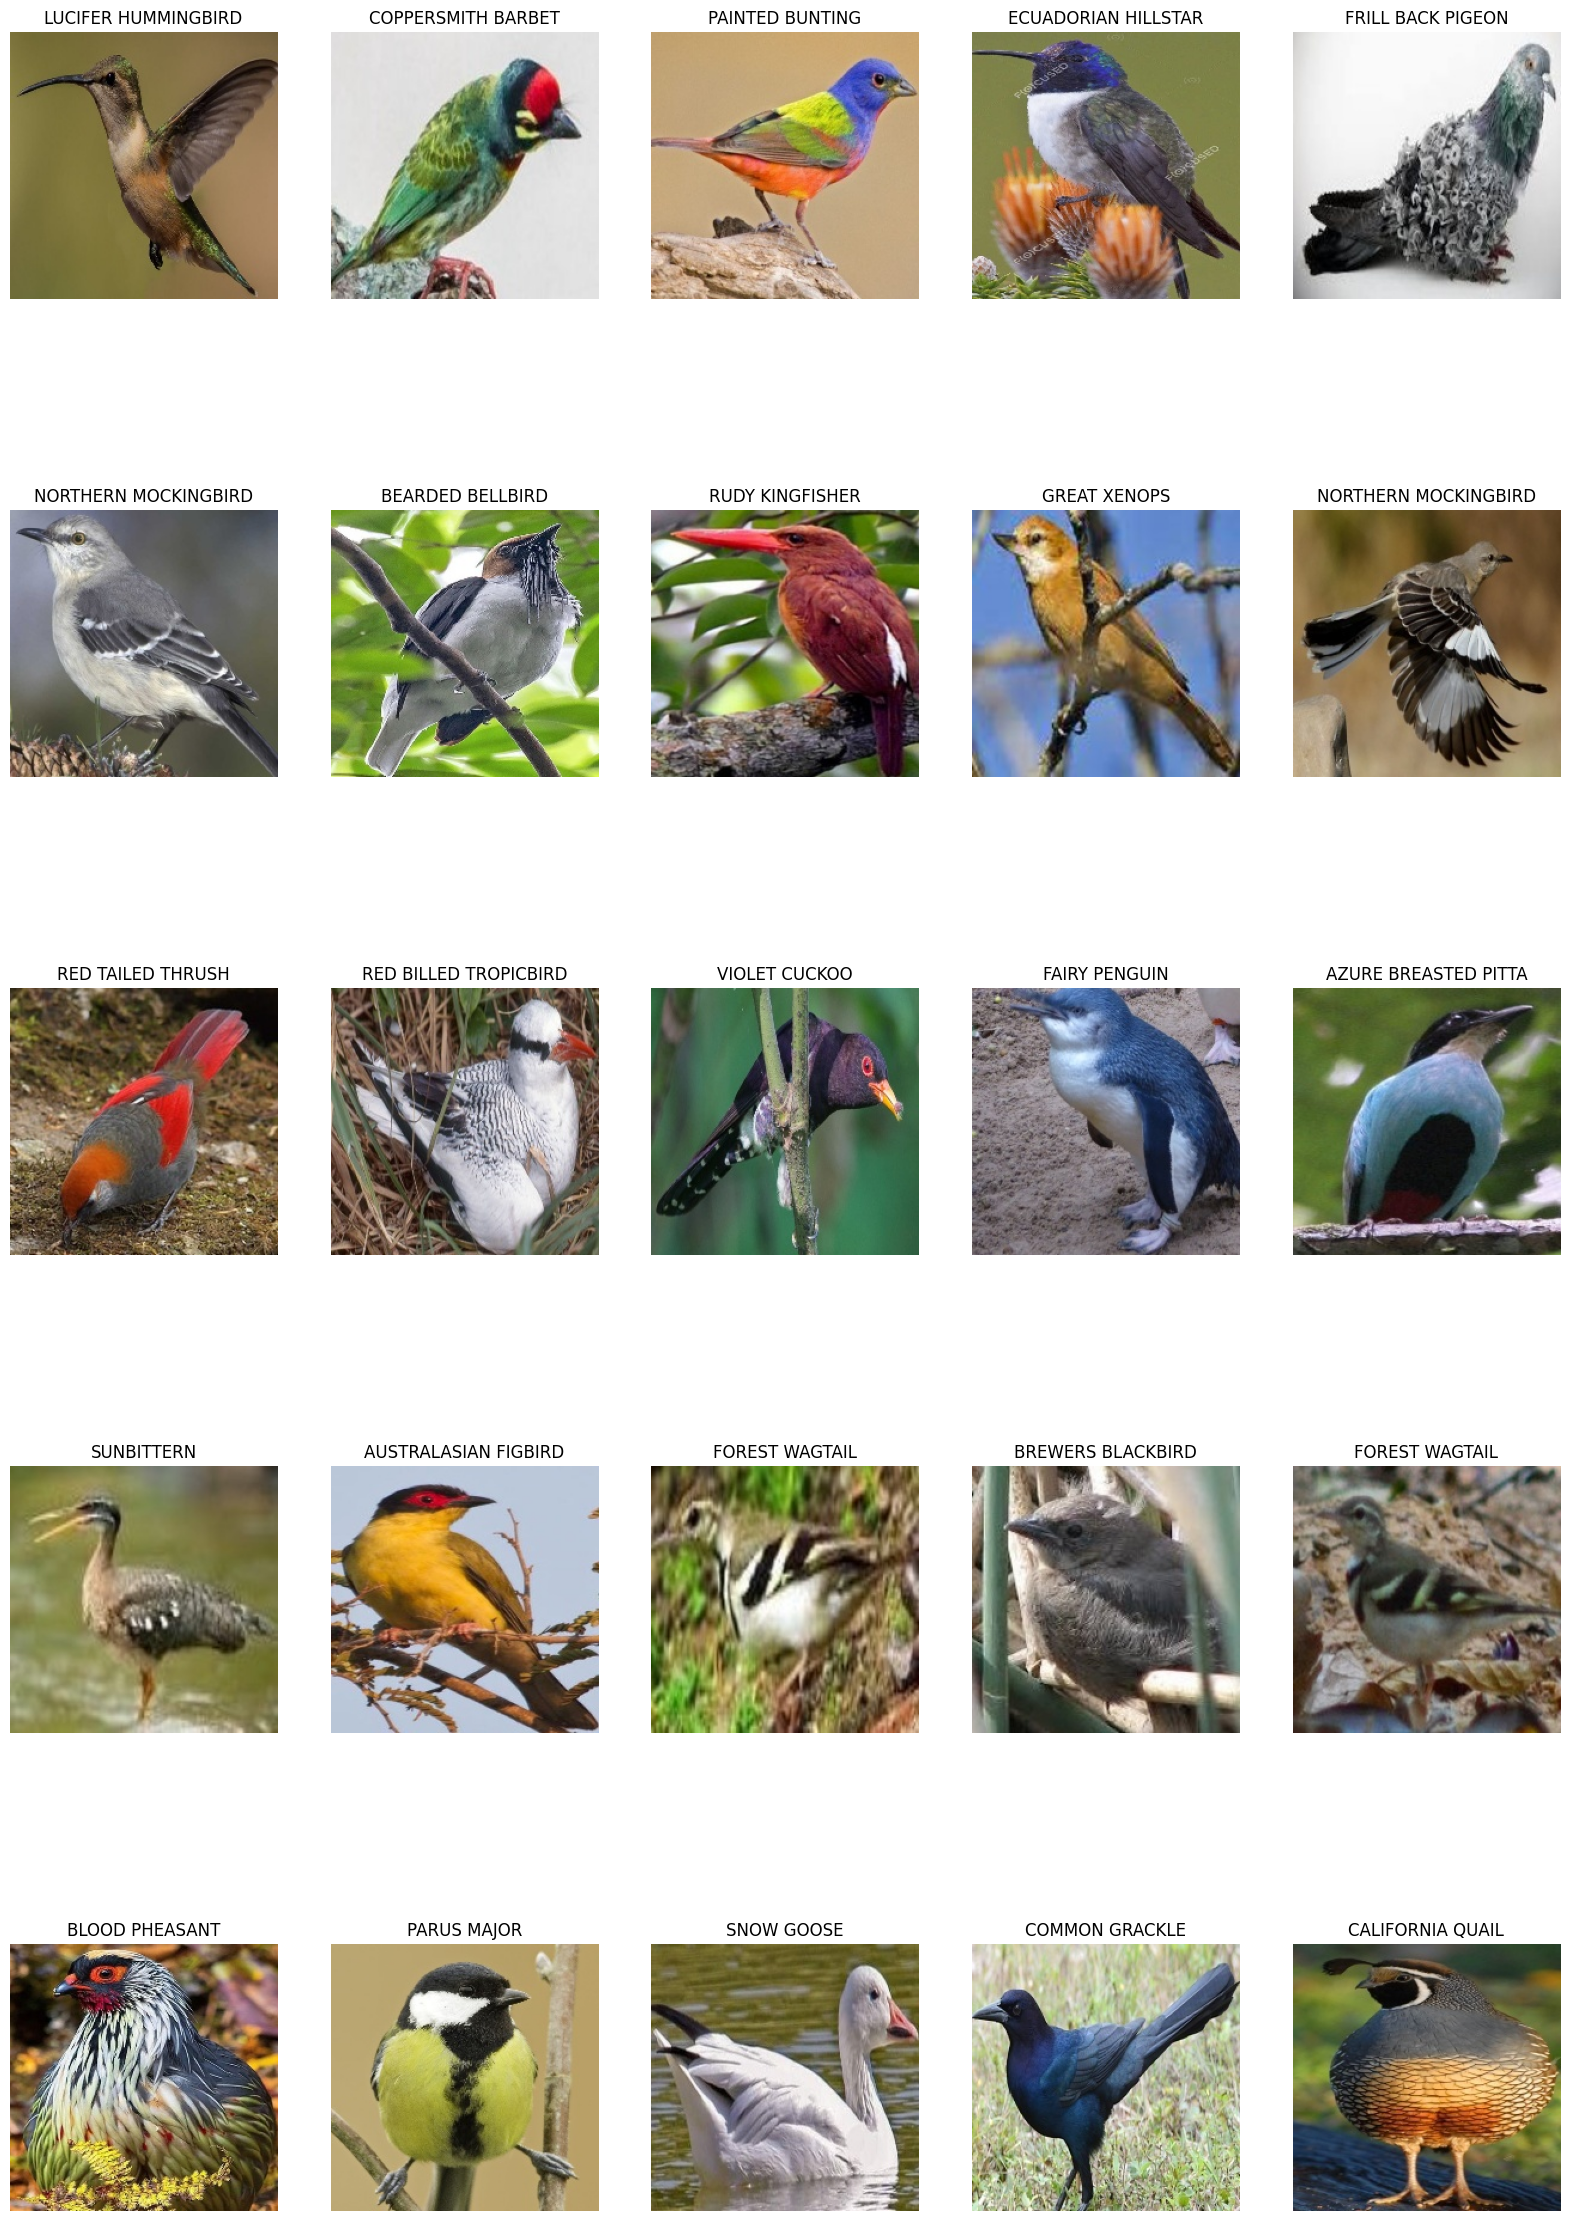

In [4]:
import random

train_files = train_generator.filepaths
train_labels = train_generator.classes
class_name = list(train_generator.class_indices.keys())

length_images = len(train_labels)
sample_size = min(length_images, 25)
sample_images = random.sample(range(length_images), sample_size)

for i in range(sample_size):
    plt.rcParams['figure.figsize'] = (20, 30)
    img = plt.imread(train_files[sample_images[i]])
    plt.subplot(5, 5, i+1)
    plt.title(class_name[train_labels[sample_images[i]]])
    plt.imshow(img)
    plt.axis('off')

plt.show()

### 2. Pre-Trained Model Configuration

In [5]:
my_new_model = Sequential()

In [7]:
resnet_weights_path = '/kaggle/input/resnett50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [10]:
RESNET50_POOLING_AVERAGE = 'avg'

In [11]:
my_new_model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))

In [12]:
my_new_model.add(Dense(num_classes, activation = 'softmax'))

In [13]:
my_new_model.layers[0].trainable = True

### 3. Model Compilation and Training

In [14]:
my_new_model.compile(loss = 'categorical_crossentropy', 
                     optimizer='sgd', 
                     metrics=['accuracy'])

In [15]:
my_new_model.fit(
    train_generator,steps_per_epoch=700,
    batch_size= batch_size, validation_data=val_generator, epochs=4)

Epoch 1/4
700/700 [==============================] - 523s 714ms/step - loss: 3.7900 - accuracy: 0.3779 - val_loss: 1.3134 - val_accuracy: 0.7676
Epoch 2/4
700/700 [==============================] - 487s 696ms/step - loss: 1.0471 - accuracy: 0.8222 - val_loss: 0.5725 - val_accuracy: 0.8945
Epoch 3/4
700/700 [==============================] - 484s 691ms/step - loss: 0.5569 - accuracy: 0.8981 - val_loss: 0.3642 - val_accuracy: 0.9291
Epoch 4/4
700/700 [==============================] - 483s 690ms/step - loss: 0.3739 - accuracy: 0.9321 - val_loss: 0.2794 - val_accuracy: 0.9387


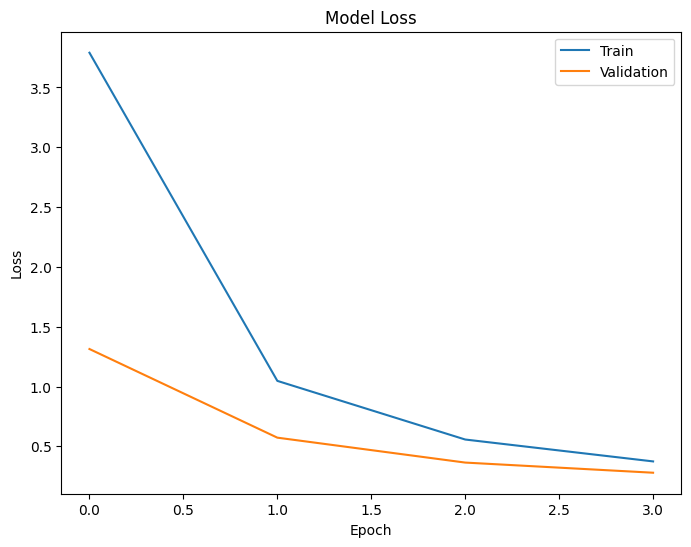

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Plot training loss
plt.plot(my_new_model.history.history['loss'])
plt.plot(my_new_model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### 4. Model Evaluation

In [17]:
test_predictions = my_new_model.predict(test_generator)
test_labels = test_generator.classes
test_files = test_generator.filepaths
class_labels = list(test_generator.class_indices.keys())

42/42 [==============================] - 30s 690ms/step


In [18]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(test_labels, np.argmax(test_predictions, axis=1))

print(f'Test accuracy: {test_acc:.2%}')

Test accuracy: 96.11%


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted labels
test_pred_labels = np.argmax(test_predictions, axis=1)


In [20]:

# Create confusion matrix
confusion_matrix(test_labels, test_pred_labels)


array([[5, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5]])

In [21]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)

# Select the first 10 classes
num_classes = 10
cm_first_10_classes = cm[:num_classes, :num_classes]

# Print the confusion matrix for the first 10 classes
print(cm_first_10_classes)


[[5 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


In [22]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, test_pred_labels, target_names=class_labels)

# Print classification report
print(report)


                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      1.00      1.00         5
                ABBOTTS BOOBY       1.00      0.80      0.89         5
   ABYSSINIAN GROUND HORNBILL       1.00      0.80      0.89         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
            AFRICAN FIREFINCH       1.00      1.00      1.00         5
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
        AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       0.83      1.00      0.91         5
               ALBERTS TOWHEE       1.00      1.00      1.00         5
         ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
                ALPINE CHOUGH       0.80      0.80      0.80         5
     

### 5. Prediction

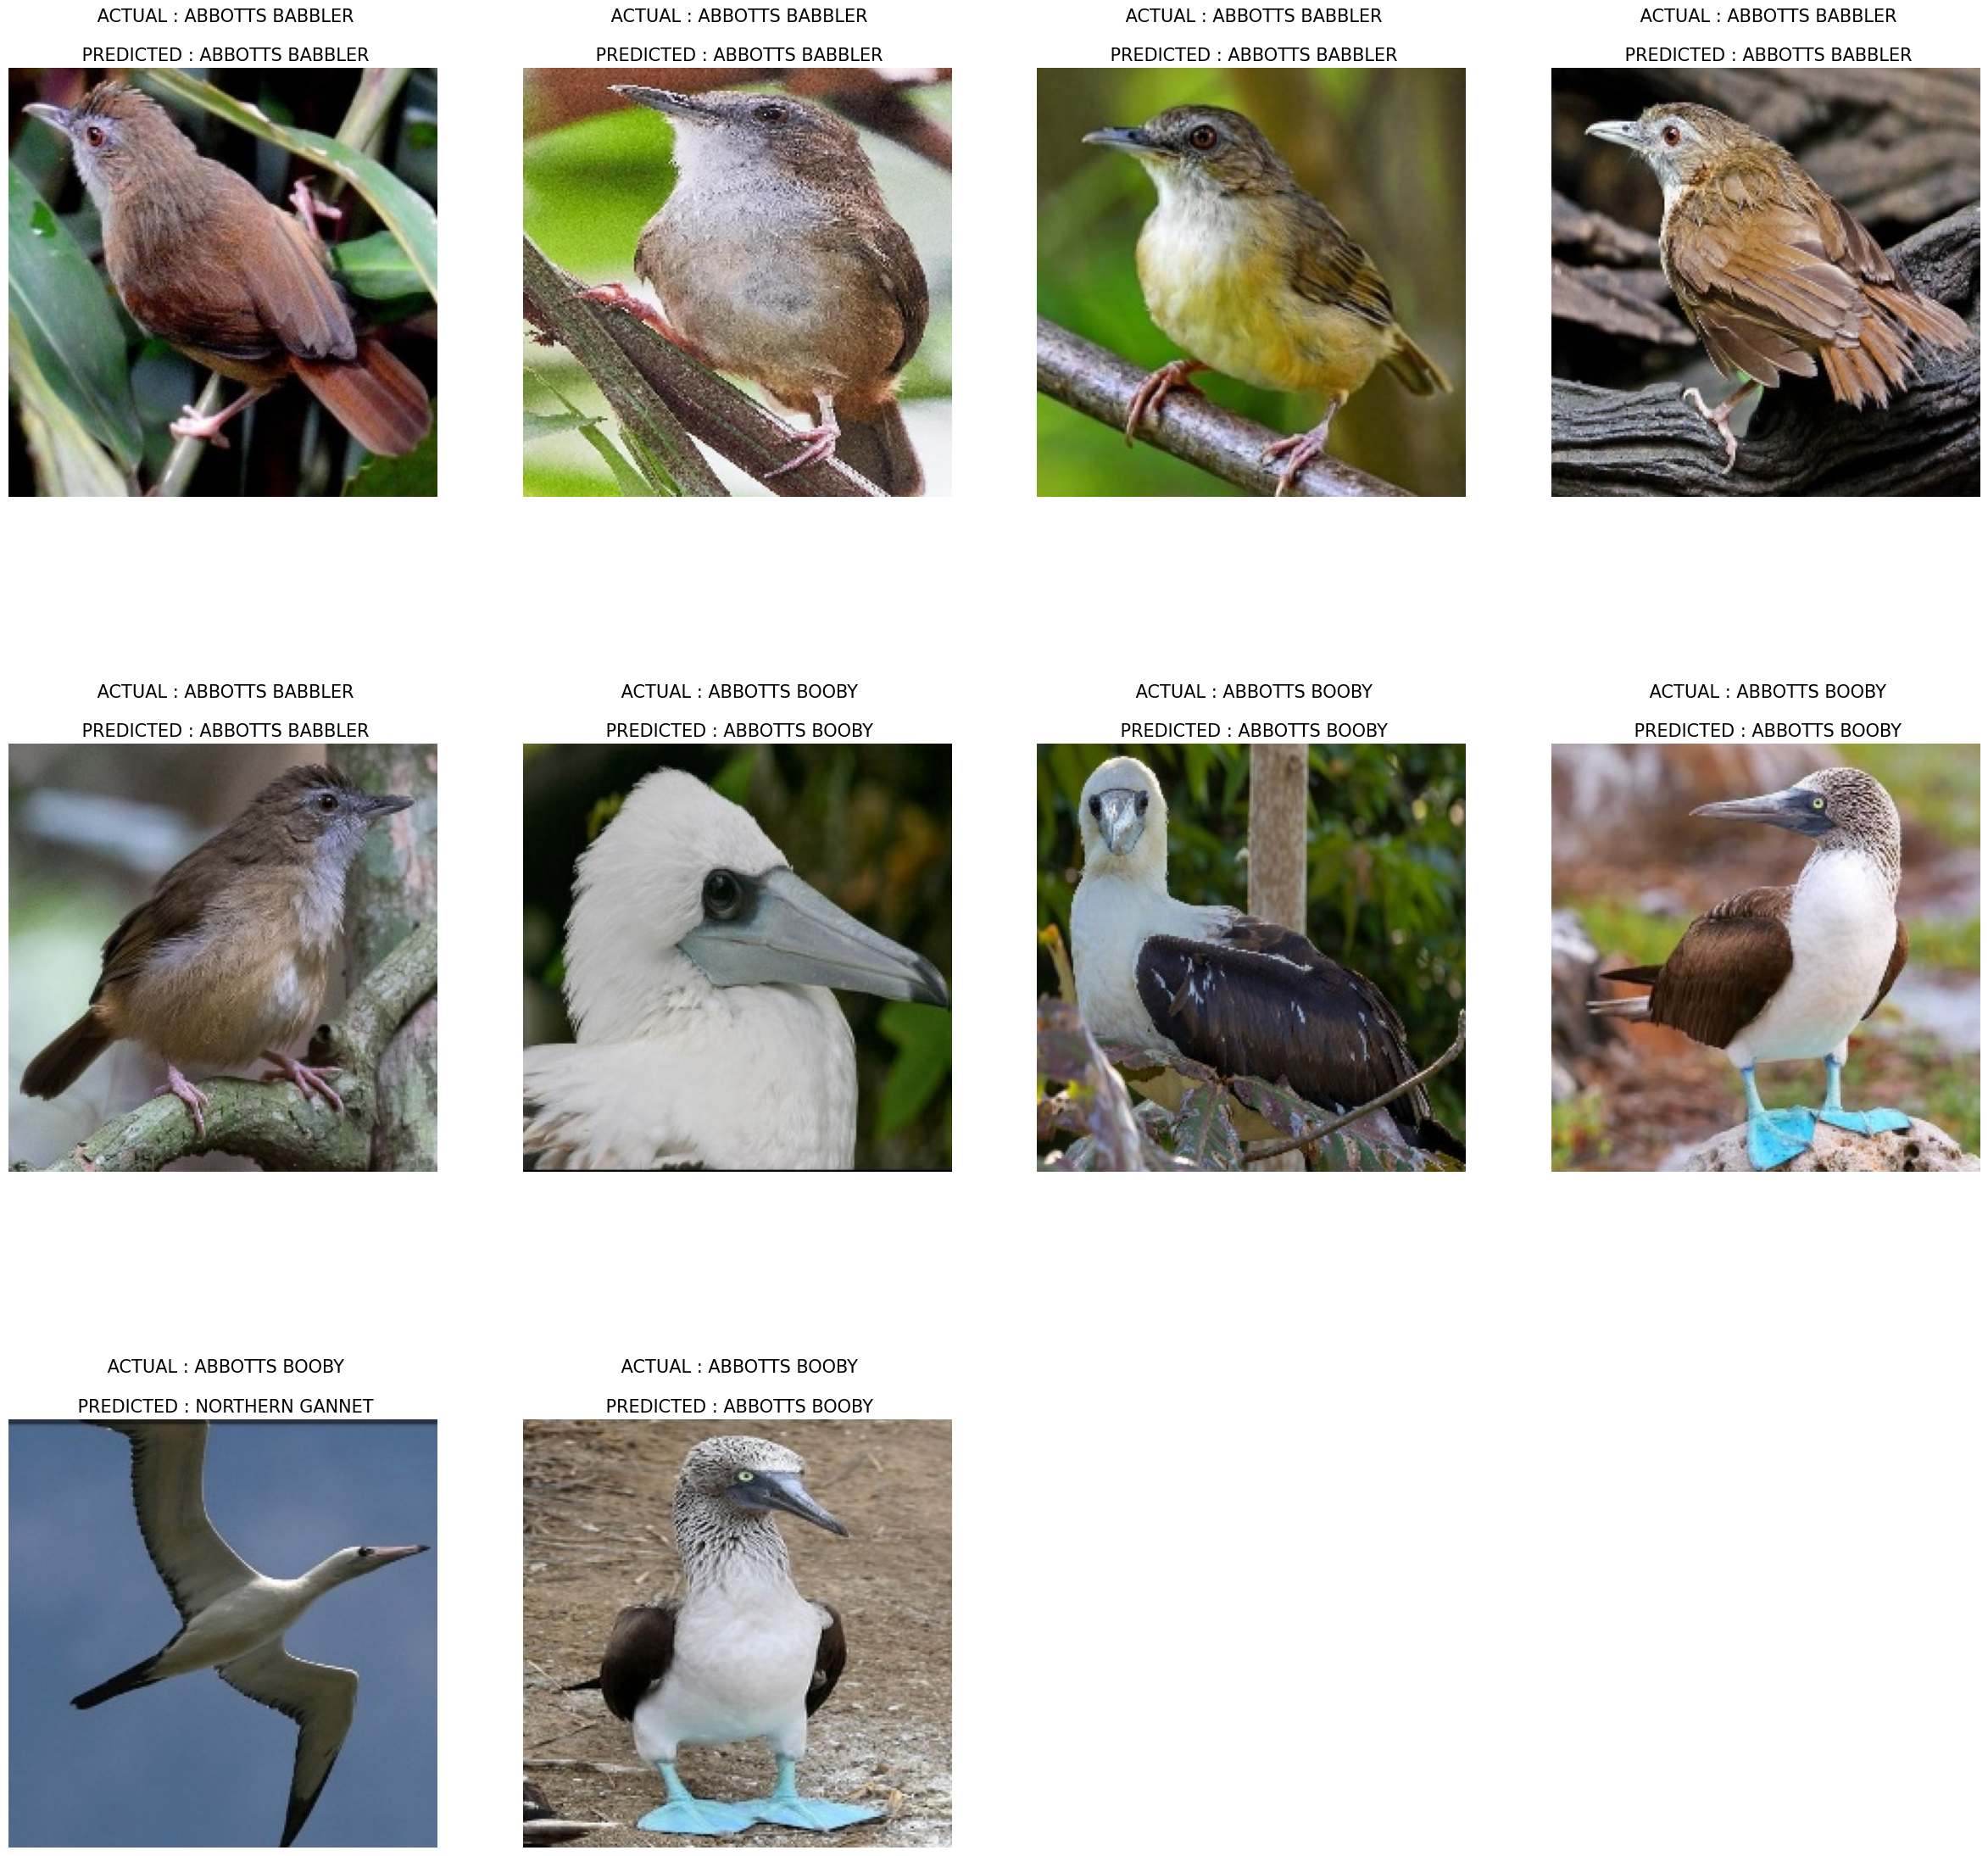

In [26]:
length = len(test_labels)
sample = min(10, 20)
    
for i in range(sample):
    plt.rcParams['figure.figsize'] = (30, 50)
    img = plt.imread(test_files[i])
    pred_label = np.argmax(test_predictions[i])
    actual_label = test_labels[i] 
    
    plt.subplot(5,4,i+1)
    plt.imshow(img)
    plt.title(f" ACTUAL : {class_labels[actual_label]}\n\n PREDICTED : {class_labels[pred_label]}",fontdict={'fontsize': 15})
    plt.axis('off')
    
plt.show()

> Thank you for reading my notebook! I hope you found it helpful in some way.
> 
> If you did, please consider upvoting it. If you have any suggestions or improvements, please leave a comment and let me know. Your feedback is greatly appreciated!

* loss curve illustration
* fitting of the model
* classification report
* confusion matrix
* how to improve model
* AUC ROC curve (binary)